# Data Analysis and Plots for Exploration

The following notebook contains code to analyze and plot data for benzyl chloride hydrolysis. The data is from...

"Changes in mechanism and transition state structure for solvolysis reactions of ring substituted benzyl chlorides in aqueous solution." P.E. Yeary, J.P. Richard, *J. Phys. Org. Chem.*, **2024**, *37*, e4600. https://doi.org/10.1002/poc.4600 

This notebook presents attempts to reproduce the calculations and the plots from the paper.

## Load Data Set

First let us load the data.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Explorations/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

github_location = "data/"
sigmatype = "s_plus"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]



################################################################################
### Read data set. The fields are separated by commas; comments are enabled  
################################################################################

df1 = pd.read_csv(github_location + "Table_1_2.csv",
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Designation", 
                 comment = "#") 

#df1.insert(3, "Total_Sigma", np.NaN, allow_duplicates = False)     # Insert a column for the total sigma value

display(df1)

,Description,para,sub1,sub2,kobs,MeOH/TFE,MeOH/H2O,H_2O/TFE
Designation,,,,,,,,
1-Cl,MeO-BnCl,p-OCH3,H,H,2.200000e+00,26.0,13.0,2.0
MeO-1-Cl,MeO-MeO-BnCl,p-OCH3,m-OCH3,H,7.200000e-01,26.0,16.0,1.6
Br-1-Cl,MeO-Br-BnCl,p-OCH3,m-Br,H,5.700000e-03,16.0,8.2,1.9
m-CN-1-Cl,MeO-CN-BnCl,p-OCH3,m-CN,H,5.900000e-05,8.7,3.8,2.3
NO2-1-Cl,MeO-NO2-BnCl,p-OCH3,m-NO2,H,1.400000e-05,8.7,3.6,2.4
"Br,NO2-1-Cl",MeO-Br-NO2-BnCl,p-OCH3,m-Br,m-NO2,5.800000e-08,41.0,6.2,6.5
di-NO2-1-Cl,MeO-NO2-NO2-BnCl,p-OCH3,m-NO2,m-NO2,2.200000e-08,82.0,5.5,14.8
Me-2-Cl,Me-Me-BnCl,p-CH3,m-CH3,H,1.700000e-04,5.8,4.5,1.3
2-Cl,Me-BnCl,p-CH3,H,H,6.000000e-05,7.3,3.5,2.1


## Calculated Substituent Parameters 
This table presents the $\sigma$ LFER values calculated according to the method of the authors (I think.)
 The data series are as follows:


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option("display.max_rows", None, "display.max_columns", None)

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  
################################################################################

df2 = pd.read_csv(github_location + "Calculated_sigmas.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

display(df2)

,sigma_n,sigma_r,sigma_I,sigma_R+
Substituent,,,,
p-OCH3,-0.13,-0.66,0.27,-1.02
m-OCH3,0.12,0.00,0.12,0.00
p-CH3,-0.12,-0.20,-0.04,-0.25
m-CH3,-0.07,0.00,-0.07,0.00
p-Br,0.28,-0.14,0.44,-0.30
m-Br,0.39,0.00,0.39,0.00
p-CN,0.66,0.00,0.56,0.00
m-CN,0.56,0.00,0.56,0.00
p-NO2,0.78,0.00,0.65,0.15


## Calculate Total $\sigma$ Values

There are three potential substituents in each molecule in the series. Hammett substituent constants are generally additive (within reason) so we can sum the three $\sigma$ values to create a $\sum\sigma$ value that represent the combined electronic effect of the substituents in diphenylmethylenechloride.

The code below accesses the value of $\sigma$ for each substituent and sums them up to a toyal.  This total is then entered into the dataframe. If one or more of the substituents have no asigned $\sigma$ value (e.g. *ortho*-substituents) then the total is recorded as 'NaN'

In [40]:
####################################################################
### Function to total the sigma values of multiple substituents  
####################################################################

def Total_meta_sigma(row, sigmatype, df1, df2):     # same as above but adds only the meta substituents
    total = 0.
    for sub in ["sub1","sub2"]:   # Change this list to match the columns in the data set
        a = (df1[sub][row])

        if a in df2.index:        # If the index does not have a Hammett sigma value return 'NaN'
            sigma = df2[sigmatype][a]
            total = total + float(sigma)
        else:
            total = np.NaN

    return(total)

def single_sigma(molecule, column, sigmatype, df1, df2):     # same as above but adds only the meta substituents
    total = 0.
    a = df1[column][molecule]  

    if a in df2.index:               # If the index does not have a Hammett sigma value return 'NaN'
        sigma = df2[sigmatype][a]
    else:
        sigma = np.NaN

    return(sigma)



######################################################################
### Create new columns in dataframe - columns must exist before being addressed  in next part
######################################################################

df1.insert(5, "Para_Sigma", np.NaN, allow_duplicates = False)  
df1.insert(5, "Total_meta_Sigma", np.NaN, allow_duplicates = False)     

######################################################################
### calculate combined sigma value for all molecules in dataframe  
######################################################################

for molecule in df1.index:
    df1.loc[molecule,"Total_meta_Sigma"] = Total_meta_sigma(molecule,"sigma_n",df1,df2)
    df1.loc[molecule,"Para_Sigma"] = single_sigma(molecule, "para", "sigma_r",df1,df2)

display(df1)

,Description,para,sub1,sub2,kobs,Total_meta_Sigma,Para_Sigma,MeOH/TFE,MeOH/H2O,H_2O/TFE
Designation,,,,,,,,,,
1-Cl,MeO-BnCl,p-OCH3,H,H,2.200000e+00,NaN,-0.66,26.0,13.0,2.0
MeO-1-Cl,MeO-MeO-BnCl,p-OCH3,m-OCH3,H,7.200000e-01,NaN,-0.66,26.0,16.0,1.6
Br-1-Cl,MeO-Br-BnCl,p-OCH3,m-Br,H,5.700000e-03,NaN,-0.66,16.0,8.2,1.9
m-CN-1-Cl,MeO-CN-BnCl,p-OCH3,m-CN,H,5.900000e-05,NaN,-0.66,8.7,3.8,2.3
NO2-1-Cl,MeO-NO2-BnCl,p-OCH3,m-NO2,H,1.400000e-05,NaN,-0.66,8.7,3.6,2.4
"Br,NO2-1-Cl",MeO-Br-NO2-BnCl,p-OCH3,m-Br,m-NO2,5.800000e-08,1.10,-0.66,41.0,6.2,6.5
di-NO2-1-Cl,MeO-NO2-NO2-BnCl,p-OCH3,m-NO2,m-NO2,2.200000e-08,1.42,-0.66,82.0,5.5,14.8
Me-2-Cl,Me-Me-BnCl,p-CH3,m-CH3,H,1.700000e-04,NaN,-0.20,5.8,4.5,1.3
2-Cl,Me-BnCl,p-CH3,H,H,6.000000e-05,NaN,-0.20,7.3,3.5,2.1


## $\sum \sigma^+$ vs $\log{k_{obs}}$

The authors showed separate plots for each set of para-substutents. Only the meta substituents provid the x-axis for the Hammett plots in these cases. If there is a change in mechanism, then perhaps it will be revealed in a normal Hammett plot.

We sum up the $\sigma^+$ values for all three substituent positions. I am using $\sigma^+$ because the proposed mechanism at the extreme left of the plot is a carbocation intermediate.



In [41]:
y = np.log10(df1["kobs"])
x = df1["Total_Sigma"]   # Also try "Total_Sigma"

plt.plot(x,y, "ko")
#plt.axvline(x=0.32)

KeyError: 'Total_Sigma'

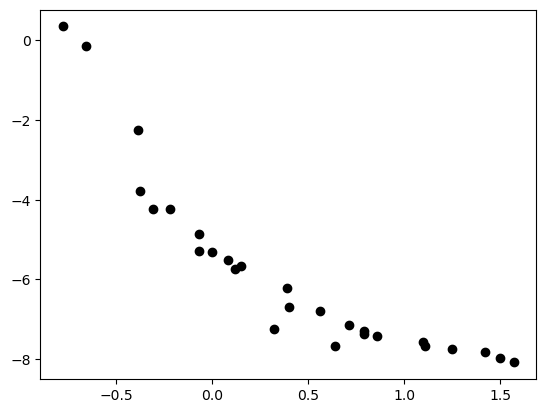

In [126]:
y = np.log10(df1["kobs"])
xs = df1["Total_Sigma"]   # Also try "Total_Sigma"
xsp = df1["Total_Sigma_plus"]   # Also try "Total_Sigma"
x = xs + 1.0*(xsp-xs)

plt.plot(x,y, "ko")

In [127]:
df1[df1["para"]!="p-OCH3"]

,Description,para,sub1,sub2,kobs,Total_Sigma,Total_Sigma_plus,Total_meta_Sigma,Total_meta_Sigma_plus,Para_Sigma,Para_Sigma_plus,MeOH/TFE,MeOH/H2O,H_2O/TFE
Designation,,,,,,,,,,,,,,
Me-2-Cl,Me-Me-BnCl,p-CH3,m-CH3,H,1.700000e-04,-0.24,-0.38,-0.07,-0.07,-0.17,-0.31,5.8,4.5,1.3
2-Cl,Me-BnCl,p-CH3,H,H,6.000000e-05,-0.17,-0.31,0.00,0.00,-0.17,-0.31,7.3,3.5,2.1
Br-2-Cl,Me-Br-BnCl,p-CH3,m-Br,H,3.000000e-06,0.22,0.08,0.39,0.39,-0.17,-0.31,26.0,6.6,3.9
NO2-2-Cl,Me-NO2-BnCl,p-CH3,m-NO2,H,2.000000e-07,0.54,0.40,0.71,0.71,-0.17,-0.31,52.0,9.4,5.5
"Br,NO2-2-Cl",Me-Br-NO2-BnCl,p-CH3,m-Br,m-NO2,5.100000e-08,0.93,0.79,1.10,1.10,-0.17,-0.31,61.0,6.9,8.8
di-NO2-2-Cl,Me-NO2-NO2-BnCl,p-CH3,m-NO2,m-NO2,2.200000e-08,1.25,1.11,1.42,1.42,-0.17,-0.31,82.0,5.8,14.1
Me-3-Cl,H-Me-BnCl,H,m-CH3,H,5.300000e-06,-0.07,-0.07,-0.07,-0.07,0.00,0.00,16.0,8.3,1.9
3-Cl,H-BnCl,H,H,H,4.900000e-06,0.00,0.00,0.00,0.00,0.00,0.00,22.0,7.5,2.9
MeO-3-Cl,H-MeO-BnCl,H,m-OCH3,H,1.800000e-06,0.12,0.12,0.12,0.12,0.00,0.00,18.0,10.5,1.7
